# Walmart Weekly Sales Forecasting
## Objective
To forecast weekly sales using economic indicators and time-based features.
## Dataset
Walmart historical sales dataset containing store-wise weekly sales along with economic and seasonal indicators.
## Dataset Features
- Store
- Date
- Weekly_Sales
- Holiday_Flag
- Temperature
- Fuel_Price
- CPI
- Unemployment
## Approach
- Data Cleaning & Preprocessing
- Exploratory Data Analysis
- Feature Engineering (Year, Month, Week)
- Model Training (Linear Regression, Random Forest)
- Evaluation (MAE, RMSE, R²)
- Residual Analysis
- Time Series Cross Validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

plt.style.use("default")

## 1. Data Loading and Initial Inspection

In this section, the dataset is loaded and examined to understand its structure, data types, and overall size.
This helps identify potential data quality issues early.

In [2]:
df = pd.read_csv("data/Walmart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
df.shape

(6435, 8)

In [6]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## 2. Data Quality Checks

Before analysis, missing values and duplicate records are checked to ensure the dataset is reliable for modeling.

In [8]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

**Observation:**  
The dataset does not contain significant missing values or duplicates, indicating good data quality for further analysis.

In [10]:
#Univariate Analysis

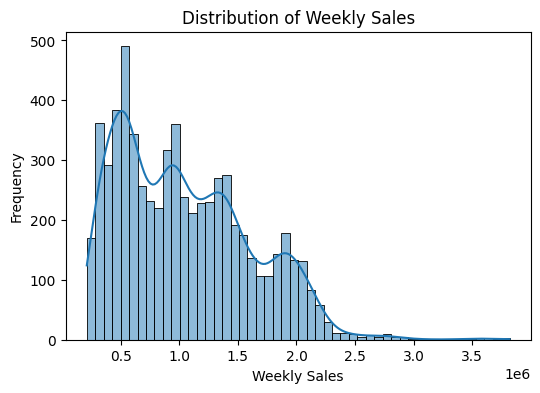

In [11]:
plt.figure(figsize=(6,4))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

**Insight:**  
The distribution of weekly sales is right-skewed, with most values concentrated in the lower to mid range and a long tail of high sales values.  
This indicates the presence of peak-demand weeks, likely due to seasonal or holiday effects, and suggests that non-linear models may better capture sales behavior.

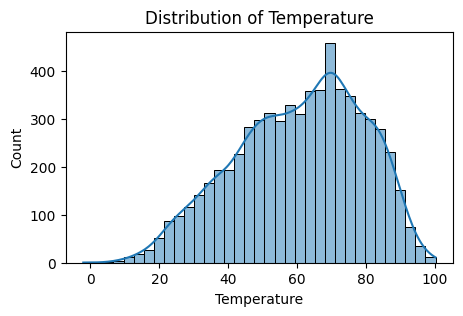

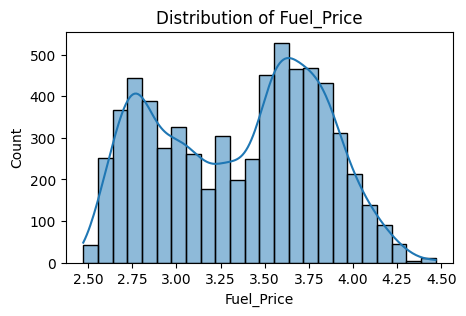

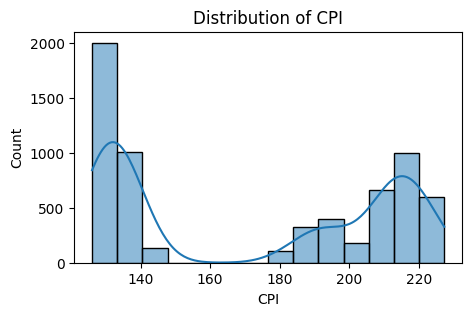

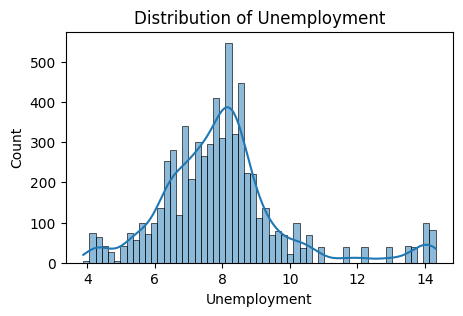

In [12]:
num_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

**Insight:**  
Temperature values are fairly well distributed, with most observations concentrated in the mid-range.  
This suggests that sales data spans multiple seasons, allowing the model to learn seasonal effects related to weather variations.

**Insight:**  
Fuel prices show a multi-modal distribution, indicating different pricing phases over time.  
This reflects real-world fluctuations in fuel costs, which may indirectly influence consumer spending behavior.

**Insight:**  
CPI values appear clustered into distinct ranges, indicating periods of varying inflation levels.  
This suggests that sales data spans multiple economic conditions, which may impact purchasing power and demand.

**Insight:**  
Unemployment rates are mostly concentrated around a central range, with a few higher-value outliers.  
This indicates relatively stable employment conditions during most periods, with occasional economic stress phases.

In [13]:
#Bivariate Analysis

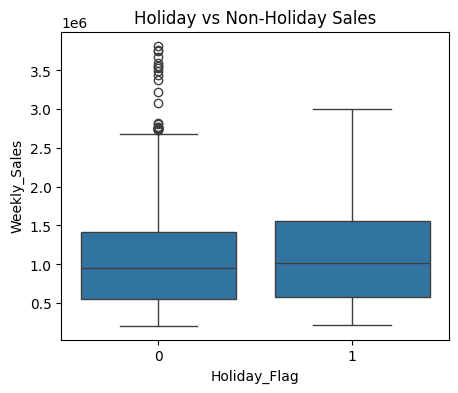

In [14]:
plt.figure(figsize=(5,4))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Holiday vs Non-Holiday Sales")
plt.show()

**Insight:**  
Holiday weeks tend to show a slightly higher median weekly sales compared to non-holiday weeks.  
Additionally, holiday weeks exhibit greater variability, indicating the presence of peak demand periods during holidays.

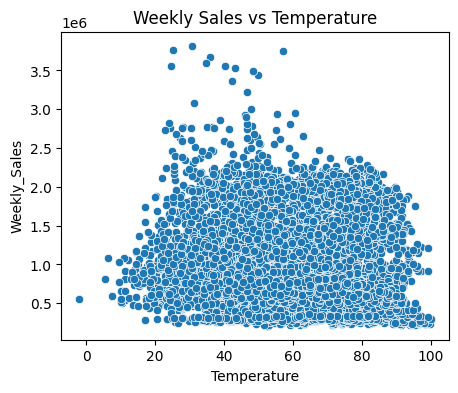

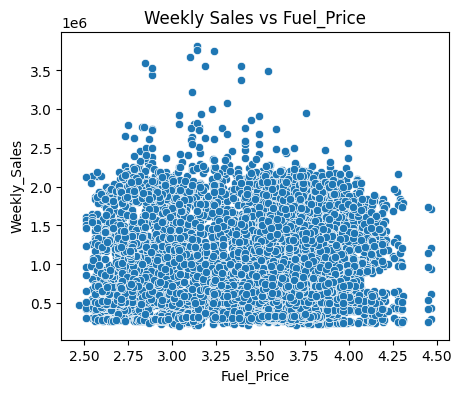

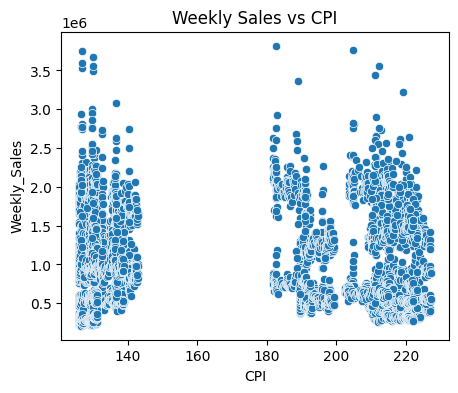

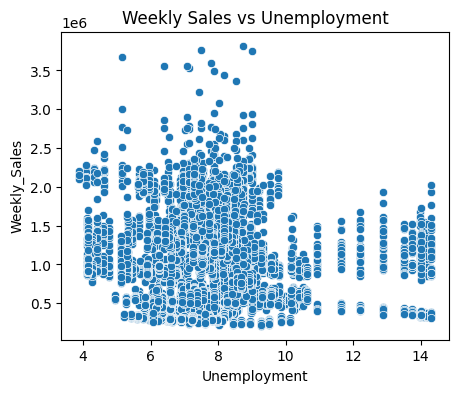

In [15]:
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[col], y=df['Weekly_Sales'])
    plt.title(f"Weekly Sales vs {col}")
    plt.show()

**Insight:**  
There is no strong linear relationship between temperature and weekly sales.  
Sales values are widely spread across all temperature ranges, suggesting temperature alone does not directly drive sales.

**Insight:**  
Weekly sales do not show a clear linear trend with fuel prices.  
Sales appear dispersed across all fuel price ranges, indicating that fuel price has a limited direct impact on short-term sales.

**Insight:**  
Weekly sales values are clustered across distinct CPI ranges, reflecting different economic phases.  
However, no strong linear relationship is observed between CPI and sales.

**Insight:**  
Weekly sales do not exhibit a strong linear relationship with unemployment rates.  
Sales values are widely spread across all unemployment levels, suggesting that unemployment has a limited direct short-term impact on weekly sales, though it may influence demand indirectly over longer periods.

In [16]:
corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
corr

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.063810,0.009464,-0.072634,-0.106176
Temperature,-0.063810,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.101158,-0.034684,-0.302020,1.000000


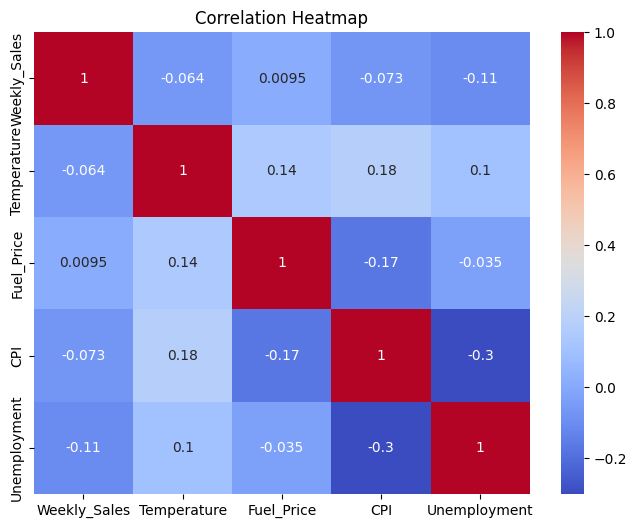

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Insight:**  
The correlation heatmap shows that weekly sales have weak linear relationships with temperature, fuel price, CPI, and unemployment.  
This indicates that sales behavior is influenced by multiple interacting factors rather than any single variable.  
Additionally, some economic indicators such as CPI and unemployment show moderate correlation with each other, reflecting underlying macroeconomic conditions.

## Final EDA Summary

- Weekly sales exhibit high variability with occasional extreme values.
- Holidays introduce higher variance and peak sales periods.
- Economic indicators show weak linear correlation with sales.
- Sales patterns are driven by a combination of time-based, seasonal, and contextual factors.

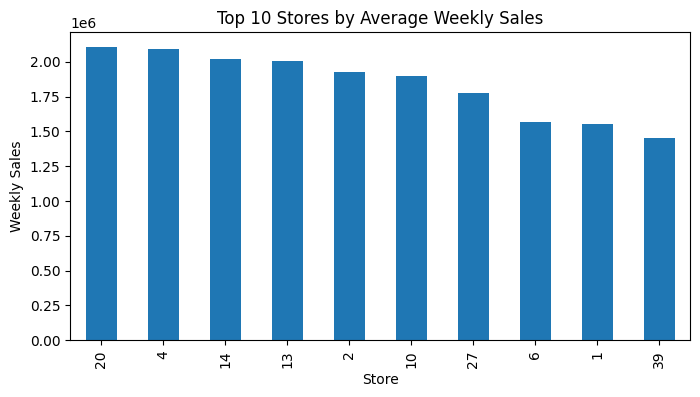

In [18]:
store_avg = df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

store_avg.head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Stores by Average Weekly Sales")
plt.ylabel("Weekly Sales")
plt.show()

In [19]:
import scipy.stats as stats
import numpy as np

sales = df['Weekly_Sales']
mean = np.mean(sales)
ci = stats.t.interval(
    confidence=0.95,
    df=len(sales)-1,
    loc=mean,
    scale=stats.sem(sales)
)

mean, ci

(np.float64(1046964.8775617715),
 (np.float64(1033173.2080071042), np.float64(1060756.5471164389)))

In [20]:
df['Date'].head(10)

0    05-02-2010
1    12-02-2010
2    19-02-2010
3    26-02-2010
4    05-03-2010
5    12-03-2010
6    19-03-2010
7    26-03-2010
8    02-04-2010
9    09-04-2010
Name: Date, dtype: object

In [21]:
df['Date'].dtype

dtype('O')

In [22]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [23]:
df['Date'].isnull().sum()

np.int64(3870)

In [24]:
df[df['Date'].isnull()].head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2,1,NaT,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,NaT,1409727.59,0,46.63,2.561,211.319643,8.106
6,1,NaT,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,NaT,1404429.92,0,51.45,2.732,211.018042,8.106
10,1,NaT,1466058.28,0,66.32,2.808,210.488700,7.808
11,1,NaT,1391256.12,0,64.84,2.795,210.439123,7.808
12,1,NaT,1425100.71,0,67.41,2.780,210.389546,7.808
14,1,NaT,1494251.50,0,74.78,2.854,210.337426,7.808
15,1,NaT,1399662.07,0,76.44,2.826,210.617093,7.808
16,1,NaT,1432069.95,0,80.44,2.759,210.896761,7.808


In [25]:
df.shape

(6435, 8)

In [26]:
df = df.dropna(subset=['Date'])

In [27]:
df['Date'].isnull().sum()

np.int64(0)

In [28]:
df = df.sort_values('Date')

In [29]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)

In [30]:
df[['Date', 'Year', 'Month', 'Week']].head()

,Date,Year,Month,Week
177,2010-01-10,2010,1,1
1178,2010-01-10,2010,1,1
3037,2010-01-10,2010,1,1
1893,2010-01-10,2010,1,1
4181,2010-01-10,2010,1,1


In [31]:
y = df['Weekly_Sales']

In [32]:
X = df[
    [
        'Year',
        'Month',
        'Week',
        'Holiday_Flag',
        'Temperature',
        'Fuel_Price',
        'CPI',
        'Unemployment'
    ]
]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

mae_lr, rmse_lr





(464676.1333347941, np.float64(554414.3827184842))

In [35]:
from sklearn.metrics import r2_score
r2_lr = r2_score(y_test, y_pred_lr)
r2_lr

0.01459487082794031

In [36]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

mae_rf, rmse_rf



(398305.93527168466, np.float64(484873.3274154916))

In [37]:
from sklearn.metrics import r2_score
r2_rf = r2_score(y_test, y_pred_rf)
r2_rf

0.24629320453346182

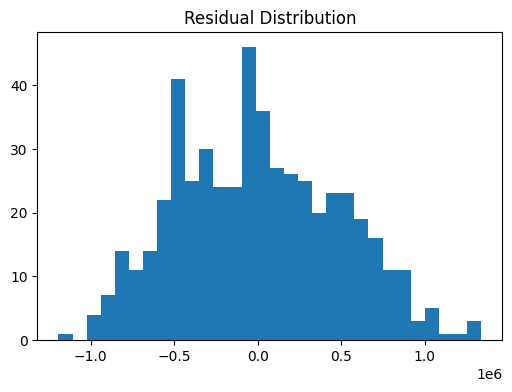

In [38]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.title("Residual Distribution")
plt.show()

### Residual Analysis

The residuals are approximately centered around zero,
indicating that the model does not exhibit strong systematic bias.

However, the wide spread and heavy tails suggest that
the model struggles to capture extreme sales spikes.

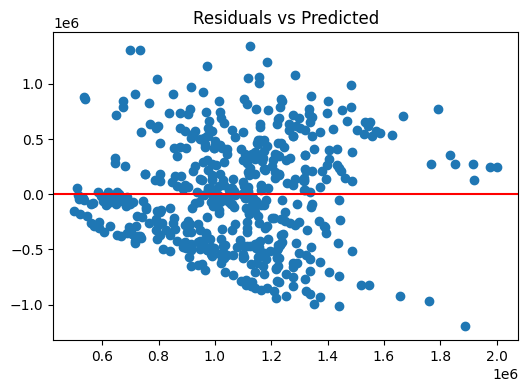

In [39]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred_rf, residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs Predicted")
plt.show()

### Residual vs Predicted Analysis

The residual plot shows that errors are centered around zero,
indicating no strong global bias.

However, a funnel-shaped pattern suggests heteroscedasticity,
where prediction error increases with higher sales values.

Additionally, the model slightly overpredicts at very high sales levels,
indicating difficulty in modeling extreme spikes.

In [40]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R^2': [r2_lr, r2_rf]
})

results

,Model,MAE,RMSE,R^2
0,Linear Regression,464676.133335,554414.382718,0.014595
1,Random Forest,398305.935272,484873.327415,0.246293


In [41]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(rf, X, y, cv=tscv, scoring='neg_mean_absolute_error')

-scores.mean()

np.float64(397121.75938407355)

### Model Comparison Interpretation

Random Forest outperformed Linear Regression in both MAE and RMSE.
This indicates that the relationship between features and weekly sales
is nonlinear. Tree-based models better capture feature interactions
and seasonal variations.

In [42]:
importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances

Unemployment    0.321027
Temperature     0.263013
CPI             0.234908
Fuel_Price      0.104743
Week            0.032372
Month           0.023761
Year            0.014771
Holiday_Flag    0.005405
dtype: float64

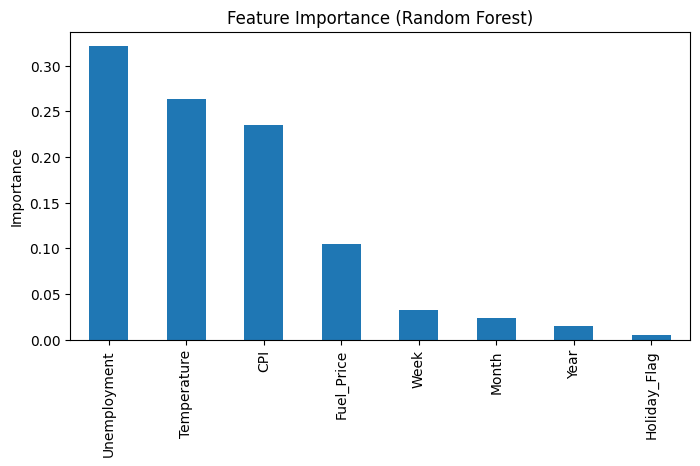

In [43]:
importances.plot(kind='bar', figsize=(8,4))
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance")
plt.show()

### Feature Importance Analysis

Unemployment, Temperature, and CPI were the most influential predictors.
This suggests that macroeconomic conditions significantly impact weekly sales.

Holiday_Flag had minimal importance, possibly because its effect is
indirectly captured by other seasonal or economic variables.

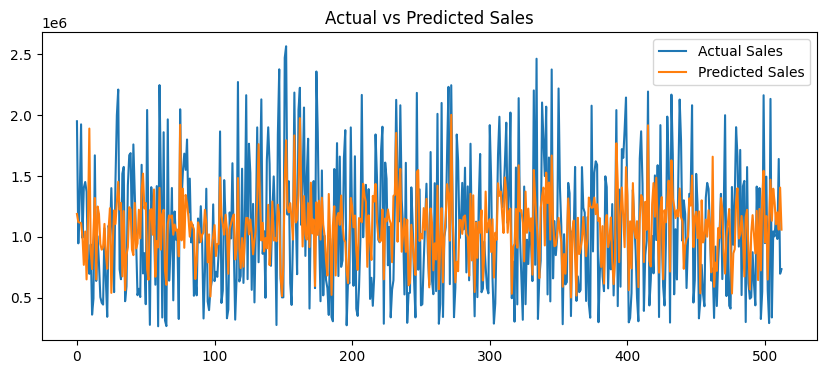

In [44]:
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label="Actual Sales")
plt.plot(y_pred_rf, label="Predicted Sales")
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.show()

### Actual vs Predicted Sales Analysis

The model captures overall trends but underestimates extreme peaks.
This suggests that while the model generalizes well,
it struggles with sudden high-sales events.

### Limitations

- Model does not include store-specific effects.
- Extreme sales spikes are underpredicted.
- No hyperparameter tuning was performed.
- External promotional events were not considered.